# MATH 152 Lab 3 Overview

1. Find the volume of the frustum of a cone with inner radius $R_2$, outer radius $R_1$, and height $h$.

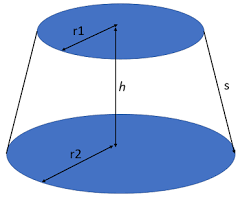

We put coordinate axes on the above image so that the trapezoid is at points $(0,0)$,$(R_1,0)$, $(R_2,h)$, and $(0,h)$ respectively.
At height $0 \leq y \leq h$, the horizontal cross section of this solid is a disk of radius $r(y) = x$, where $(x,y)$ lies on the straight line connecting the points $(R_2,h)$ to $(R_1,0)$.
This line has slope $$ -\frac{h}{R_1-R_2} $$ and passes through the point $(R_1,0)$, so the equation of the line is given by $$ y = - \frac{h}{R_1-R_2}(x - R_1). $$
We solve this equation for $x$ in terms of $y$, which then gives us the radius $r(y)$.
The area of the cross section is then $$ A(y) = \pi r(y)^2, $$ so that the total volume is given by $$ V = \int_0^h A(y) dy.$$
We will use sympy to give us the final expression for $V$.

In [ ]:
def problem_1():
    import sympy as sp
    x, y, R1, R2, h = sp.symbols('x y R1 R2 h')
    r = sp.solve(y + h/(R1-R2)*(x-R1), x)[0]
    A = sp.pi*r**2
    V = sp.integrate(A, (y, 0, h))
    print('V = {}'.format(V.simplify()))

problem_1()

V = pi*h*(R1**2 + R1*R2 + R2**2)/3


2. The work required to stretch a spring from a natural length of 30cm to a length of 42cm is 3 Joules.
Find the work required to stretch the spring an additional 12cm.

We recall Hooke's law, which states that the force $f(x)$ in Newtons required to stretch a spring a distance $x$ m from rest is given by $$ f(x) = kx, $$ where $k$ is the spring constant in units N / m.
We also recall that, for a nonconstant force $f(x)$, the work $W$ in J = N m done by the force $f(x)$ in N to move an object from $x = a$ m to $x = b$ m is given by $$ W = \int_a^b f(x) dx. $$

To apply this to our problem, if we put our origin at the springs resting position and convert our lengths from cm to m, then we have that $$ 3 = W = \int_0^{0.12} kx dx = k \int_0^{0.12}xdx, $$
where the work $W$.
This let's us solve for the spring constant $k$ with units N / m.
Now that we know the spring constant, we compute the work required to stretch an addition 12 cm as $$ W = \int_{0.12}^{0.24} kx dx $$ with units of J.

We now use SymPy to perform the computations for us and give us the final numerical answer.

In [ ]:
def problem_2():
    import sympy as sp
    x = sp.symbols('x')
    k = 3 / sp.integrate(x, (x,0,0.12))
    W = sp.integrate(k*x, (x,0.12,0.24))
    print('The work required to stretch the spring an additional 12 cm is {:.2f} J.'.format(W))

problem_2()

The work required to stretch the spring an additional 12 cm is 9.00 J.


3. A tank full of water is in the shape of a circular paraboloid with radius 4m and height 4m.
    1. Find the work done in pumping all of the water out of the tank.

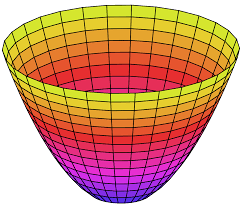

By putting our origin at the bottom of the paraboloid, the shape is generated by rotating a parabola of the form $$ y = ax^2 $$ about the $y$ axis.
We also know that at the height $y = 4$, the point $(x,y) = (4,4)$ lies on the parabola.
Therefore, we can solve for $a$ as $$ 4 = 16a. $$

Now, we cut the water into $n$ small cross-sectional pieces that are approximately cylinders with centers $(0,y_i)$, radii $r(y_i)$, and thickness $\Delta y$.
The radius of the cross section $r(y_i)$ satisfies $y_i^2 = a r(y_i)^2$ since the point $(r(y_i), y_i)$ is assumed to lie on the parabola that generates the shape of the tank.
Therefore, the area $A_i$ of the cross section at $y_i$ is $A_i = \pi r(y_i)^2$, so that the volume is $V_i = \pi r(y_i)^2 \Delta y$.

We assume that the force acting on the cross section is approximately constant.
Then, from Newton's second law, the force acting on this cross section in N is $$ f_i = m_i g, $$ where $m_i$ is the mass of the cross section at $y_i$ in kg and $g = 9.8067$ m / s<sup>2</sup> is the acceleration due to gravity.
To get the mass of the cross section, we use the fact that $$ m_i = \rho V_i, $$ where $\rho = 997 $ kg / m<sup>3</sup> is the density of water and $V_i$ is the volume of the cross section computed earlier in m<sup>3</sup>.

Now that we have the force acting on the cross section at height $y_i$ above the bottom of the tank, the distance this cross section must travel in order to reach the top of the tank is $d_i = 4 - y_i$.
Therefore, the work done to pump this small cross section out of the tank is $W_i = f_id_i$.
The total work needed to pump all of the water out of the tank is then approximately $$ W \approx \sum_{i=1}^n f_id_i = \sum_{i=1}^n \rho \pi r(y_i)^2(4-y_i)\Delta y. $$
Taking a limit $n \to \infty$, meaning that we take more cross sections of smaller thickness, then gives us the exact amount of work needed to pump all of the water out of the top of the tank $$ W = \lim_{n\to\infty} \sum_{i=1}^n \rho \pi g r(y_i)^2(4-y_i)\Delta y \\ = \pi\rho g\int_0^4 r(y)^2(4-y)dy. $$

We now use SymPy to set up and compute the final answer for $W$.

In [ ]:
def problem_3_1():
    import sympy as sp
    y = sp.symbols('y')
    a = 4 / 16
    r = sp.sqrt(y/a)
    rho = 997
    g = 9.8067
    W = sp.integrate(rho * sp.pi * g * r**2 * (4 - y), (y, 0, 4))
    print('The work required to pump all of the water out of the tank is {:.0f} J'.format(W))

problem_3_1()

The work required to pump all of the water out of the tank is 1310559 J


2. Find the depth of the water in the tank when 500,000 J of work has been done.

Let $h$ be the depth of the water in the tank, which is also the height of the water from the bottom of the tank.
Then when the water has been pumped out to a height of $h$, the water from $y = h$ to $y = 4$ has been removed.
The work required to do this is then $$ W(h) = \rho \pi g \int_h^4 r(y)^2(4-y)\,dy. $$
We now use SymPy to solve for when $$ W(h) = 500,000. $$  

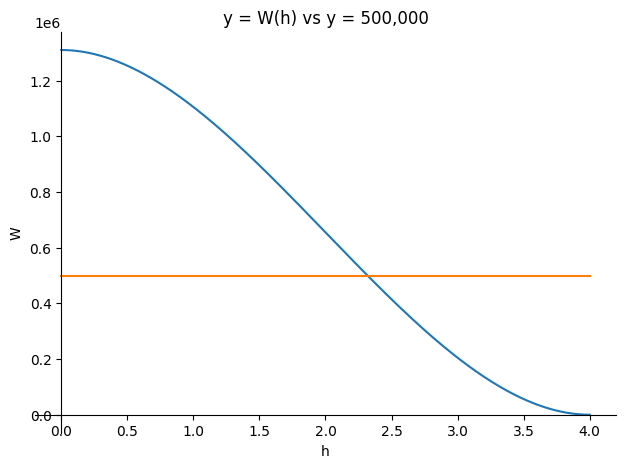

The depth of the water in the tank when 500,000 J of work has been done is 2.32 m


In [ ]:
def problem_3_2():
    import sympy as sp
    from sympy.plotting import plot

    y, h = sp.symbols('y h')
    a = 4 / 16
    r = sp.sqrt(y/a)
    rho = 997
    g = 9.8067
    W = sp.integrate(rho * sp.pi * g * r**2 * (4 - y), (y, h, 4))

    # we plot the work done as a function of the height and the line y = 500_000
    # this lets us see that a guess of h = 2.5 is a good choice for the numerical
    # solver
    sp.plot(W, 500_000, (h, 0, 4), xlabel = 'h', ylabel = 'W', title='y = W(h) vs y = 500,000')
    h0 = sp.nsolve(W - 500_000, h, 2.5)
    print('The depth of the water in the tank when 500,000 J of work has been done is {:.2f} m'.format(h0))

problem_3_2()